In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold

import matplotlib.pyplot as plt
%matplotlib inline

Utility functions is a module I wrote to contain a lot of the code found myself using, mainly because I was using the same code over and over and wanted to be able to use them from multiple notebooks. Most of this code is functions to scale or transform data, to fit and score a model, or to plot something.

In [2]:
import success as scs
import finance as fin
import merge_sets as ms
import utility_functions as uf

In [3]:
df = pd.read_pickle('./data/df_v1.pkl')
df.shape

(1461, 58)

In [4]:
df.columns

Index(['district', 'A1', 'A2', 'A3', 'A4', 'A', 'B1', 'B2', 'B', 'C1', 'C2',
       'C3', 'C', 'D', 'J', 'K1', 'K2', 'K3', 'K4', 'K5', 'K6', 'K', 'O', 'P',
       'Q', 'R', 'S', 'T', 'keys', 'type', 'enroll', 'instr_rat', 'tchrs_rat',
       'env_rat', 'ldr_rat', 'comm_rat', 'trust_rat', 'grd_5_english',
       'grd_5_math', 'ell', 'iep', 'slf_cont', 'econ_need', 'temp_hous', 'hra',
       'asian', 'black', 'hisp', 'white', 'prncpl_exp', 'tchrs_w_exp',
       'attend', 'chron_abs', 'tchr_attend', 'overage', 'incm_eng',
       'incm_math', 'achievement'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1461 entries, bard hs early college to tottenville hs
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   district       1461 non-null   object 
 1   A1             1439 non-null   float64
 2   A2             1439 non-null   float64
 3   A3             1439 non-null   float64
 4   A4             1439 non-null   float64
 5   A              1439 non-null   float64
 6   B1             1439 non-null   float64
 7   B2             1439 non-null   float64
 8   B              1439 non-null   float64
 9   C1             1439 non-null   float64
 10  C2             1439 non-null   float64
 11  C3             1439 non-null   float64
 12  C              1439 non-null   float64
 13  D              1439 non-null   float64
 14  J              1439 non-null   float64
 15  K1             1439 non-null   float64
 16  K2             1439 non-null   float64
 17  K3             1439 non-nul

In [6]:
df.overage = df.overage.fillna(0)

In [7]:
df.describe()

A1           A2            A3           A4             A  \
count   1439.000000  1439.000000   1439.000000  1439.000000   1439.000000   
mean    6761.032377  2277.357345   5007.727741    84.338165  14130.457936   
std     1402.410094  1015.084408   1222.688442   131.739015   3473.967877   
min     3156.610000   322.130000   2462.620000     0.000000   6941.370000   
25%     5852.295000  1512.110000   4196.100000    10.125000  11815.375000   
50%     6565.650000  2102.830000   4784.450000    41.000000  13487.550000   
75%     7370.485000  2819.395000   5579.935000   109.680000  15749.335000   
max    18670.390000  6857.750000  13349.740000  1668.790000  38157.190000   

                B1           B2            B           C1           C2  ...  \
count  1439.000000  1439.000000  1439.000000  1439.000000  1439.000000  ...   
mean    841.632502   466.306532  1307.939944   571.259861   316.506588  ...   
std     372.471526   206.368012   578.839795   320.362723   177.497053  ...   
min     245.320000   135.920000   381.240000     0.000000     0.000000  ...   
25%     578.500000   320.515000   899.020000   356.075000   197.285000  ...   
50%     756.720000   419.260000  1175.980000   509.060000   282.050000  ...   
75%    1022.755000   566.660000  1589.415000   718.115000   397.870000  ...   
max    3556.660000  1970.570000  5527.230000  2602.020000  1441.650000  ...   

             white   prncpl_exp  tchrs_w_exp       attend    chron_abs  \
count  1461.000000  1451.000000  1461.000000  1461.000000  1461.000000   
mean      0.135410     7.282426     0.780438     0.912115     0.277557   
std       0.190459     4.972912     0.132019     0.044323     0.147009   
min       0.000000     0.000000     0.200000     0.632000     0.000000   
25%       0.016000     3.100000     0.706000     0.893000     0.158000   
50%       0.037000     6.100000     0.805000     0.920000     0.267000   
75%       0.180000    10.900000     0.879000     0.943000     0.384000   
max       0.934000    27.200000     1.000000     0.985000     0.838000   

       tchr_attend      overage    incm_eng   incm_math  achievement  
count  1461.000000  1461.000000  708.000000  709.000000  1461.000000  
mean      0.964943     0.022603    2.718121    2.706742     3.395250  
std       0.010020     0.051903    0.457209    0.524707     0.741301  
min       0.916000     0.000000    1.730000    1.820000     1.300000  
25%       0.959000     0.000000    2.407500    2.320000     2.850000  
50%       0.965000     0.000000    2.670000    2.570000     3.380000  
75%       0.971000     0.007000    2.960000    2.970000     3.960000  
max       1.000000     0.339000    4.200000    4.390000     4.990000  

[8 rows x 55 columns]

In [8]:
df_train, df_test = train_test_split(df, test_size=.2, random_state=10)

All variable correlations -
*Too many variables!*

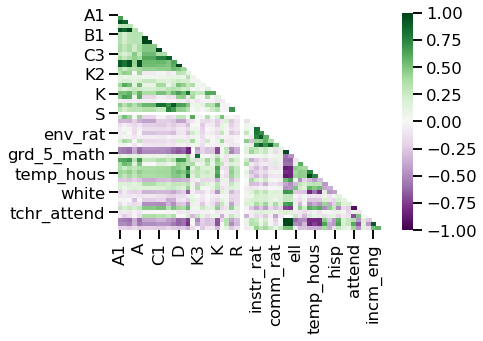

In [9]:
df_train_heat = df_train.corr()
mask = np.zeros_like(df_train_heat)
mask[np.triu_indices_from(mask)] = True
s = sns.plotting_context(context='talk')
with sns.plotting_context(s):
    sns.heatmap(df_train_heat, mask=mask, cmap='PRGn', vmin=-1, vmax=1)

This encompasses most of my variables, but drops the incoming math and english figures (too many nulls!) and the spending numbers in the 'Other' category - which includes things like Pre-K spending that I decided are not relevant for the scope of this project.

In [10]:
df_train = df_train[[*scs.ALL, *fin.ALL, 'achievement']].dropna()

In [62]:
df_test = df_test[[*scs.ALL, *fin.ALL, 'achievement']].dropna()

Correlation of each variable with target variable

In [11]:
corrs = df_train.corr()
corrs['achievement']

enroll         0.091583
asian          0.382919
black         -0.376179
hisp          -0.124383
white          0.289870
ell           -0.055224
iep           -0.281859
slf_cont      -0.270116
econ_need     -0.334292
temp_hous     -0.341034
hra           -0.352485
attend         0.410036
chron_abs     -0.466098
overage       -0.116046
prncpl_exp     0.166792
tchrs_w_exp    0.091254
tchr_attend    0.170579
instr_rat      0.448010
tchrs_rat      0.298246
env_rat        0.401728
ldr_rat        0.261672
comm_rat       0.105191
trust_rat      0.260033
A             -0.225847
B             -0.207713
C             -0.237178
A1            -0.208881
A2            -0.196940
A3            -0.223070
A4            -0.151312
B1            -0.207713
B2            -0.207712
C1            -0.241003
C2            -0.241003
C3            -0.166602
D             -0.268224
J             -0.241245
K1            -0.339375
K2            -0.160027
K3            -0.029759
K4            -0.248293
K5            -0

Maximum positive and negative correlations with another variable, for each variable

In [12]:
for c in df_train.corr().columns:
    corr_not_self = list(df_train.corr().index)
    corr_not_self.remove(c)
    corr_col = corrs[c].loc[corr_not_self]
    maxmin = [(corr_col.idxmax(),round(corr_col.max(), 4)), (corr_col.idxmin(),round(corr_col.min(), 4))]
    print(f'Max positive corr {c}: {maxmin[0][0]} = {maxmin[0][1]} \n Max negative corr {c}: {maxmin[1][0]} = {maxmin[1][1]}')

Max positive corr enroll: asian = 0.3844 
 Max negative corr enroll: B = -0.4132
Max positive corr asian: attend = 0.4328 
 Max negative corr asian: chron_abs = -0.4981
Max positive corr black: chron_abs = 0.4621 
 Max negative corr black: white = -0.4568
Max positive corr hisp: econ_need = 0.581 
 Max negative corr hisp: white = -0.4233
Max positive corr white: attend = 0.3885 
 Max negative corr white: econ_need = -0.8075
Max positive corr ell: K3 = 0.8367 
 Max negative corr ell: black = -0.322
Max positive corr iep: A = 0.6816 
 Max negative corr iep: asian = -0.4768
Max positive corr slf_cont: iep = 0.5993 
 Max negative corr slf_cont: overage = -0.3113
Max positive corr econ_need: hra = 0.9888 
 Max negative corr econ_need: white = -0.8075
Max positive corr temp_hous: econ_need = 0.7557 
 Max negative corr temp_hous: white = -0.5787
Max positive corr hra: econ_need = 0.9888 
 Max negative corr hra: white = -0.7899
Max positive corr attend: asian = 0.4328 
 Max negative corr atten

I noticed a strong correlation between A (Teacher salaries) and iep (% students with disabilities), so I wanted to make a variable for what teachers are paid corrected for the number of students with disabilities.
Additionally, for the sake of reducing features in the model, I created the category of poc (% black students plus % hispanic students). I didn't include % asian students in this figure because that feature is much more strongly correlated with % white students. 

In [63]:
df_train['A_non_iep'] = df_train['A'] - (df_train['iep'] * df_train['A'])
df_test['A_non_iep'] = df_test['A'] - (df_test['iep'] * df_test['A'])
df_train['poc'] = df_train['black'] + df_train['hisp']
df_test['poc'] = df_test['black'] + df_test['hisp']

In [14]:
X = df_train.drop(columns='achievement')
y = df_train['achievement']

In [15]:
uf.split_and_validate(X, y)


Validation R^2 score was: 0.3312955480783649
Feature coefficient results: 

enroll : -0.00
asian : 1.37
black : -0.15
hisp : 0.44
white : 0.76
ell : -0.80
iep : -2.16
slf_cont : -0.55
econ_need : 1.70
temp_hous : -0.19
hra : -1.37
attend : 5.75
chron_abs : -0.00
overage : 2.59
prncpl_exp : 0.01
tchrs_w_exp : 0.18
tchr_attend : 5.15
instr_rat : 2.00
tchrs_rat : -1.04
env_rat : 1.64
ldr_rat : 0.74
comm_rat : -1.38
trust_rat : -0.71
A : -1.40
B : 5.45
C : -0.07
A1 : 4.79
A2 : 4.79
A3 : 2.35
A4 : 3.92
B1 : -4.91
B2 : 0.65
C1 : -0.79
C2 : 8.70
C3 : 2.59
D : -1.31
J : -1.20
K1 : -0.67
K2 : -0.67
K3 : -0.67
K4 : -0.67
K5 : -0.67
K6 : -0.67
K : -0.53
A_non_iep : -0.00
poc : 0.29


0.3312955480783649

In [16]:
print(uf.kfold_val(X, y, rand=75)[2])

Simple mean cv r^2: 0.384 +- 0.034


In [17]:
model = sm.OLS(y, sm.add_constant(X))

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            achievement   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     19.49
Date:                Thu, 16 Jul 2020   Prob (F-statistic):          2.08e-109
Time:                        19:20:16   Log-Likelihood:                -939.31
No. Observations:                1139   AIC:                             1971.
Df Residuals:                    1093   BIC:                             2202.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -7.5221      2.443     -3.079      0.002     -12.316      -2.729
enroll         -0.0002   4.46e-05     -3.552      0.000      -0.000   -7.08e-05
asian           1.4906      0.768      1.941      0.053      -0.016       2.997
black          -0.0398      0.259     -0.153      0.878      -0.548       0.469
hisp            0.4072      0.255      1.598      0.110      -0.093       0.907
white           0.8765      0.745      1.177      0.239      -0.584       2.337
ell            -0.6878      0.300     -2.292      0.022      -1.277      -0.099
iep            -2.1902      0.875     -2.504      0.012      -3.906      -0.474
slf_cont       -0.7832      0.551     -1.421      0.156      -1.865       0.298
econ_need       1.8465      0.691      2.672      0.008       0.491       3.202
temp_hous      -0.4179      0.318     -1.316      0.189      -1.041       0.205
hra            -1.4927      0.661     -2.259      0.024      -2.789      -0.196
attend          5.6343      1.566      3.597      0.000       2.561       8.707
chron_abs       0.1875      0.461      0.407      0.684      -0.717       1.092
overage         2.0145      0.667      3.022      0.003       0.707       3.322
prncpl_exp      0.0067      0.004      1.842      0.066      -0.000       0.014
tchrs_w_exp     0.0548      0.154      0.355      0.722      -0.248       0.358
tchr_attend     4.8124      1.789      2.689      0.007       1.301       8.323
instr_rat       2.2157      0.522      4.241      0.000       1.191       3.241
tchrs_rat      -1.2945      0.556     -2.330      0.020      -2.385      -0.204
env_rat         1.5687      0.366      4.283      0.000       0.850       2.287
ldr_rat         1.0025      0.531      1.887      0.059      -0.040       2.045
comm_rat       -1.1859      0.558     -2.126      0.034      -2.280      -0.091
trust_rat      -0.8643      0.732     -1.181      0.238      -2.300       0.571
A              -0.0244      3.557     -0.007      0.995      -7.003       6.954
B               1.5126      3.817      0.396      0.692      -5.978       9.003
C              -0.7140      3.872     -0.184      0.854      -8.311       6.883
A1              2.2631      3.635      0.623      0.534      -4.870       9.396
A2              2.2631      3.635      0.623      0.534      -4.870       9.396
A3              3.1511      5.329      0.591      0.554      -7.305      13.607
A4              2.5796      2.689      0.959      0.338      -2.696       7.855
B1             -2.1595      4.887     -0.442      0.659     -11.748       7.429
B2              6.8222      5.410      1.261      0.208      -3.794      17.438
C1              1.0651      4.519      0.236      0.814      -7.801       9.931
C2              7.2472      5.424      1.336      0.182      -3.395      17.889
C3              3.2692      2.957      1.10

This function I adapted from one in one of the curriculum notebooks. It prints the regression fit, residuals and normal qq plot for each individual feature. A few things I noticed from these plots is that a number of my variables have heavy tails on the right, that a number of the residual plots have significant bowing, and that a few of the regression fit plots seem to have slightly nonlinear relationships or are very skewed.

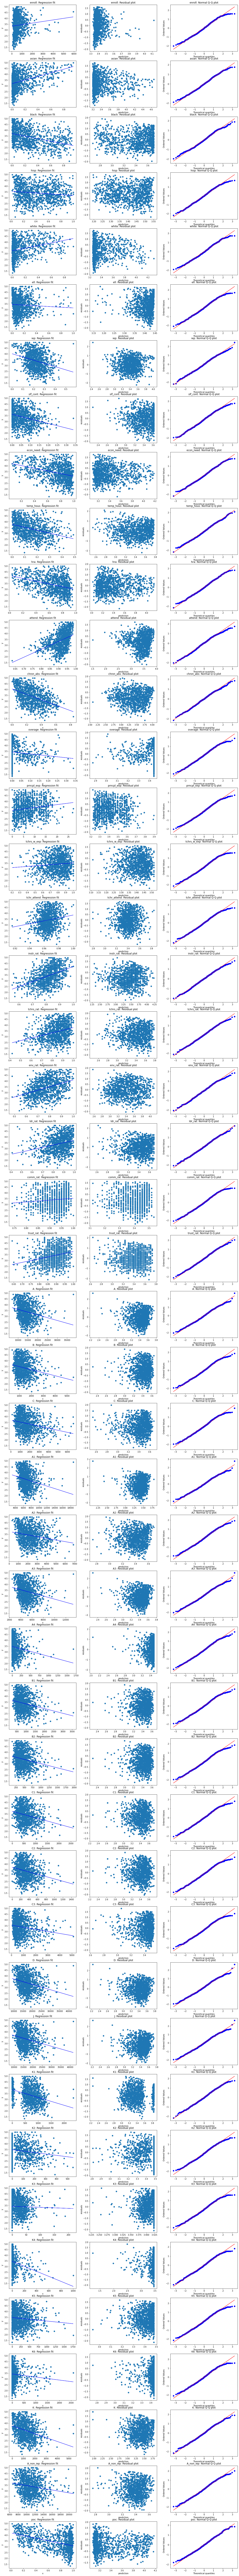

In [18]:
uf.diagnostic_plot(X, y)

Trying out a few different scaling and trasformation methods

In [19]:
X_scale = uf.std_scale(X)
X_minmax = uf.minmax_scale(X)
X_quant = uf.quantile(X)
X_yeo = uf.yeo(X)

The transformations get better scores than just scaling

In [20]:
X_quant.shape

(1139, 46)

In [21]:
print(uf.kfold_val(X_scale, y, rand=75)[2])
print(uf.kfold_val(X_minmax, y, rand=75)[2])
print(uf.kfold_val(X_quant, y, rand=75)[2])
print(uf.kfold_val(X_yeo, y, rand=75)[2])

Simple mean cv r^2: 0.384 +- 0.034
Simple mean cv r^2: 0.384 +- 0.034
Simple mean cv r^2: 0.416 +- 0.050
Simple mean cv r^2: 0.415 +- 0.037


The quantile and leo-johnson transforms both seem to improve the model significantly, so let's see how they improved the regression fit, residual and normal qq plots.

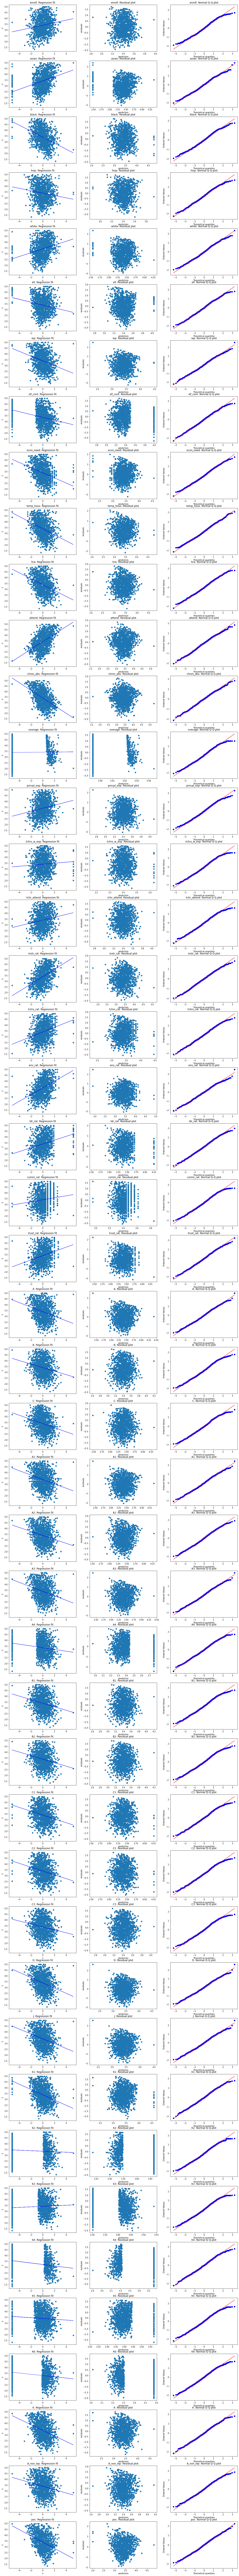

In [43]:
uf.diagnostic_plot(x_quant, y)

In [46]:
x_yeo = pd.DataFrame(X_yeo, columns=X.columns)
df_yeo = x_yeo.merge(y.reset_index(drop=True), left_index=True, right_index=True)

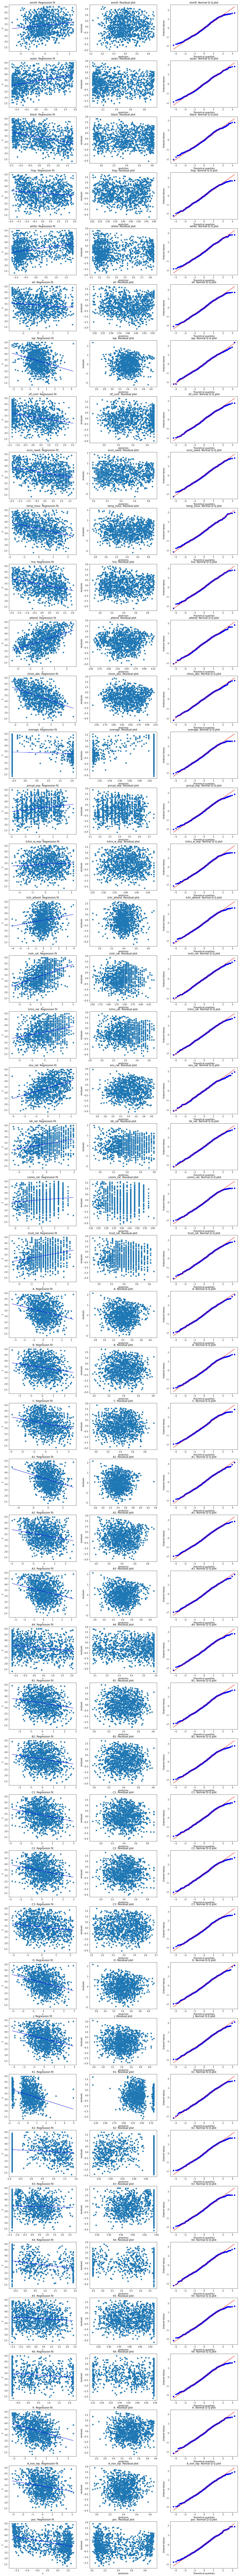

In [44]:
uf.diagnostic_plot(x_yeo, y)

Based on the above plots, I decided to pass both the Yeo-Johnson transformation and the Quantile transformation data to the modelling notebook to test. Although the Quantile transformation had a slightly higher R^2 score, it seemed more sensitive to outliers, and that it ended up taking more of the shape out of my features than the Yeo-Johnson.

In [34]:
model = sm.OLS(y, sm.add_constant(X_quant))

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            achievement   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     21.31
Date:                Thu, 16 Jul 2020   Prob (F-statistic):          2.12e-120
Time:                        19:30:27   Log-Likelihood:                -909.97
No. Observations:                1139   AIC:                             1914.
Df Residuals:                    1092   BIC:                             2151.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5604      0.059     60.371      0.000       3.445       3.676
x1            -0.0132      0.026     -0.499      0.618      -0.065       0.039
x2             0.0614      0.022      2.833      0.005       0.019       0.104
x3            -0.0517      0.033     -1.564      0.118      -0.117       0.013
x4             0.0003      0.035      0.009      0.993      -0.069       0.070
x5            -0.0206      0.027     -0.767      0.443      -0.073       0.032
x6            -0.0745      0.024     -3.131      0.002      -0.121      -0.028
x7             0.0495      0.079      0.626      0.531      -0.106       0.205
x8            -0.0413      0.012     -3.401      0.001      -0.065      -0.017
x9             0.0791      0.052      1.526      0.127      -0.023       0.181
x10           -0.0117      0.034     -0.338      0.735      -0.079       0.056
x11            0.0041      0.052      0.080      0.936      -0.097       0.106
x12            0.4786      0.074      6.434      0.000       0.333       0.625
x13            0.1527      0.074      2.073      0.038       0.008       0.297
x14            0.0775      0.011      6.773      0.000       0.055       0.100
x15            0.0391      0.017      2.281      0.023       0.005       0.073
x16           -0.0007      0.017     -0.037      0.970      -0.035       0.034
x17            0.0245      0.017      1.416      0.157      -0.009       0.059
x18            0.1519      0.038      4.008      0.000       0.078       0.226
x19           -0.0766      0.043     -1.769      0.077      -0.162       0.008
x20            0.1489      0.036      4.115      0.000       0.078       0.220
x21            0.0755      0.030      2.514      0.012       0.017       0.134
x22           -0.0071      0.026     -0.275      0.783      -0.058       0.044
x23           -0.0776      0.039     -1.972      0.049      -0.155      -0.000
x24            0.7465      0.623      1.198      0.231      -0.476       1.969
x25          368.6771    493.811      0.747      0.455    -600.249    1337.603
x26            0.0369      0.085      0.435      0.664      -0.129       0.203
x27           -0.0842      0.118     -0.712      0.477      -0.317       0.148
x28           -0.0761      0.086     -0.885      0.377      -0.245       0.093
x29           -0.2368      0.602     -0.393      0.694      -1.418       0.944
x30           -0.0106      0.010     -1.024      0.306      -0.031       0.010
x31         -291.2814    569.850     -0.511      0.609   -1409.405     826.842
x32          -77.3710    223.744     -0.346      0.730    -516.389     361.647
x33           80.3200    130.382      0.616      0.538    -175.508     336.148
x34          -80.3386    130.382     -0.616      0.538    -336.166     175.489
x35            0.0202      0.054      0.377      0.706      -0.085       0.126
x3

In [35]:
model = sm.OLS(y, sm.add_constant(X_yeo))

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            achievement   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     21.38
Date:                Thu, 16 Jul 2020   Prob (F-statistic):          9.76e-121
Time:                        19:30:28   Log-Likelihood:                -909.12
No. Observations:                1139   AIC:                             1912.
Df Residuals:                    1092   BIC:                             2149.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4021      0.016    209.150      0.000       3.370       3.434
x1            -0.0327      0.028     -1.166      0.244      -0.088       0.022
x2             0.1109      0.047      2.343      0.019       0.018       0.204
x3            -0.1223      0.054     -2.280      0.023      -0.228      -0.017
x4            -0.0562      0.046     -1.232      0.218      -0.146       0.033
x5             0.0149      0.043      0.347      0.728      -0.069       0.099
x6            -0.1189      0.039     -3.044      0.002      -0.196      -0.042
x7             0.3459      0.173      1.994      0.046       0.006       0.686
x8            -0.0496      0.029     -1.741      0.082      -0.106       0.006
x9             0.4542      0.137      3.309      0.001       0.185       0.724
x10           -0.0651      0.041     -1.600      0.110      -0.145       0.015
x11           -0.3094      0.125     -2.469      0.014      -0.555      -0.063
x12            0.7976      0.102      7.853      0.000       0.598       0.997
x13            0.4630      0.094      4.945      0.000       0.279       0.647
x14            0.2355      0.041      5.762      0.000       0.155       0.316
x15            0.0411      0.018      2.346      0.019       0.007       0.076
x16            0.0048      0.020      0.236      0.814      -0.035       0.045
x17            0.0307      0.018      1.714      0.087      -0.004       0.066
x18            0.1854      0.040      4.692      0.000       0.108       0.263
x19           -0.1614      0.057     -2.852      0.004      -0.273      -0.050
x20            0.1849      0.039      4.747      0.000       0.108       0.261
x21            0.1044      0.050      2.068      0.039       0.005       0.203
x22           -0.0360      0.028     -1.293      0.196      -0.091       0.019
x23           -0.0616      0.045     -1.372      0.170      -0.150       0.026
x24           -0.4629      0.923     -0.501      0.616      -2.274       1.349
x25         -747.3662   1347.145     -0.555      0.579   -3390.651    1895.919
x26            0.0066      0.123      0.053      0.958      -0.236       0.249
x27            0.1158      0.210      0.552      0.581      -0.296       0.527
x28            0.0642      0.162      0.397      0.691      -0.253       0.382
x29           -0.1148      0.874     -0.131      0.895      -1.829       1.599
x30            0.0044      0.032      0.140      0.889      -0.057       0.066
x31         -515.4155   1256.645     -0.410      0.682   -2981.126    1950.295
x32         1262.8288    791.415      1.596      0.111    -290.038    2815.696
x33         -729.5466    696.633     -1.047      0.295   -2096.438     637.344
x34          729.5381    696.635      1.047      0.295    -637.356    2096.432
x35            0.0494      0.075      0.658      0.511      -0.098       0.197
x3

In [42]:
df_yeo.to_pickle(path='./data/df_yeo.pkl')

In [66]:
X_test = df_test.drop(columns='achievement')
y_test = df_test['achievement']
X_test_yeo = uf.yeo(X_test)
x_test_yeo = pd.DataFrame(X_test_yeo, columns=X_test.columns)
df_test_yeo = x_test_yeo.merge(y.reset_index(drop=True), left_index=True, right_index=True)

In [67]:
df_test_yeo.to_pickle(path='./data/df_yeo_test.pkl')